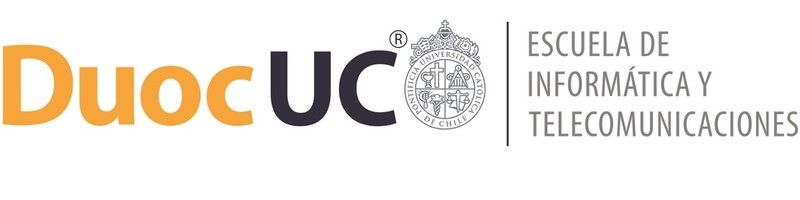

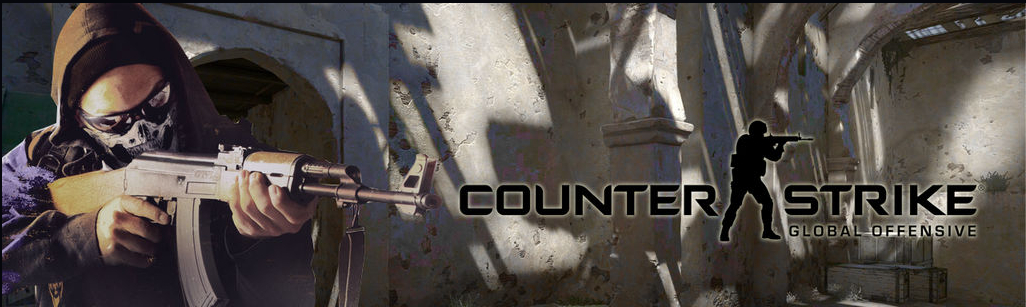

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Marcelo Soto
* ChatGPT

Docente: Profe Gio    

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

# **Contexto de Negocio: CS:GO y el Valor de las Estadísticas**

**Counter-Strike: Global Offensive (CS:GO)** es un videojuego de disparos en primera persona de tipo competitivo, donde dos equipos —*Terroristas* y *Antiterroristas*— compiten en rondas por cumplir objetivos como plantar/desactivar una bomba o eliminar al equipo contrario.

Cada jugador participa en múltiples rondas dentro de una partida (*MatchId*), y su rendimiento se mide a través de estadísticas detalladas por ronda y jugador.

Este conjunto de datos incluye variables como:
* Tipo de arma utilizada
* Daño causado
* Kills, headshots y asistencias
* Distancia recorrida
* Uso de granadas, entre otras

Estas estadísticas pueden ser aprovechadas para múltiples fines:
* 📊 **Optimización del rendimiento individual y del equipo**
* 🧠 **Desarrollo de sistemas de inteligencia artificial realistas o entrenadores virtuales**
* 🔍 **Detección de trampas o partidas manipuladas**
* 🛠️ **Creación de motores de recomendación personalizados (armas, estrategias)**
* 💵 **Análisis predictivo para apuestas, scouting de jugadores, entre otros modelos de monetización**

Estas estadísticas son útiles tanto para equipos profesionales como para motores de recomendación o detección de comportamiento anómalo.

---

# **Hipótesis de Negocio**

A partir de los datos disponibles, se pueden definir problemas tanto de regresión como de clasificación.

## Hipótesis para Tareas de Regresión

* “A mayor distancia recorrida (TravelledDistance_m), mayor tiempo de supervivencia (TimeAlive_imputed_seconds) en la misma ronda.”

H₀ (nula): β₁ = 0 (no hay relación). H₁ (alternativa): β₁ > 0 (relación positiva).


---


---

# **Relación con Contenidos de la Asignatura**


Este caso práctico permite aplicar los conceptos abordados en el curso, tales como:

* **Modelado de regresión**  
  Para predecir variables numéricas como `TimeAlive` o `MatchKills`.

* **Preprocesamiento de datos**  
  Limpieza, manejo de valores nulos, codificación de variables categóricas, normalización.

* **Selección de atributos relevantes**  
  Uso de técnicas como correlación, `RandomForestFeatureImportance`, análisis de varianza (ANOVA), entre otras.

* **Evaluación de modelos**  
  * Regresión: `MAE`, `RMSE`, `R²`  
  * Clasificación: `Accuracy`, `Precision`, `Recall`, `F1-score`, `Matriz de Confusión`

* **Detección de anomalías y outliers**  
  Identificación de partidas fuera del comportamiento normal, posible trampa o manipulación.


In [ ]:
#Importa librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette("Set2")

from google.colab import files
uploaded = files.upload()

original_filename = list(uploaded.keys())[0]
print(f"Nombre original del archivo: {original_filename}")

# Renombrar a algo más simple
new_filename = "csgo_dataset.csv"
os.rename(original_filename, new_filename)

# Cargar el dataset
df_modified = pd.read_csv(new_filename, engine='python')
df_modified.info()

Saving df_modified limpio.csv to df_modified limpio.csv
Nombre original del archivo: df_modified limpio.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   PlayerID                     79157 non-null  int64 
 1   Map                          79157 non-null  object
 2   InternalTeamId               79157 non-null  int64 
 3   MatchId                      79157 non-null  int64 
 4   RoundId                      79157 non-null  int64 
 5   RoundHeadshots               79157 non-null  int64 
 6   RoundFlankKills              79157 non-null  int64 
 7   RoundStartingEquipmentValue  79157 non-null  int64 
 8   TeamStartingEquipmentValue   79157 non-null  int64 
 9   Tiempo                       79157 non-null  int64 
 10  Distancia                    79157 non-null  int64 
 11  Participacion_Kills          79157 no

In [ ]:
df_modified.head(10)

,PlayerID,Map,InternalTeamId,MatchId,RoundId,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,Tiempo,Distancia,Participacion_Kills,Granadas
0,600,inferno,1,4,1,0,0,750,4400,45,100,0,4
1,601,inferno,1,4,1,0,0,800,4400,43,88,0,0
2,602,inferno,1,4,1,0,0,1000,4400,37,56,0,0
3,603,inferno,1,4,1,0,0,850,4400,47,89,0,0
4,604,inferno,1,4,1,0,0,1000,4400,53,108,0,2
5,605,inferno,2,4,1,0,0,850,3750,53,78,0,0
6,606,inferno,2,4,1,0,0,400,3750,53,80,0,2
7,607,inferno,2,4,1,0,0,800,3750,53,68,1,0
8,608,inferno,2,4,1,1,1,850,3750,53,87,3,0
9,609,inferno,2,4,1,2,0,850,3750,53,78,2,0


## Fase 2: Regresion Lineal

>



=== Métricas de Regresión Lineal Simple ===
RMSE: 26.59 segundos
MAE : 21.18 segundos
R²  : 0.0754

Coeficiente (pendiente) para 'Distancia': 0.1681 seg/m
Intercepto: 54.95 segundos


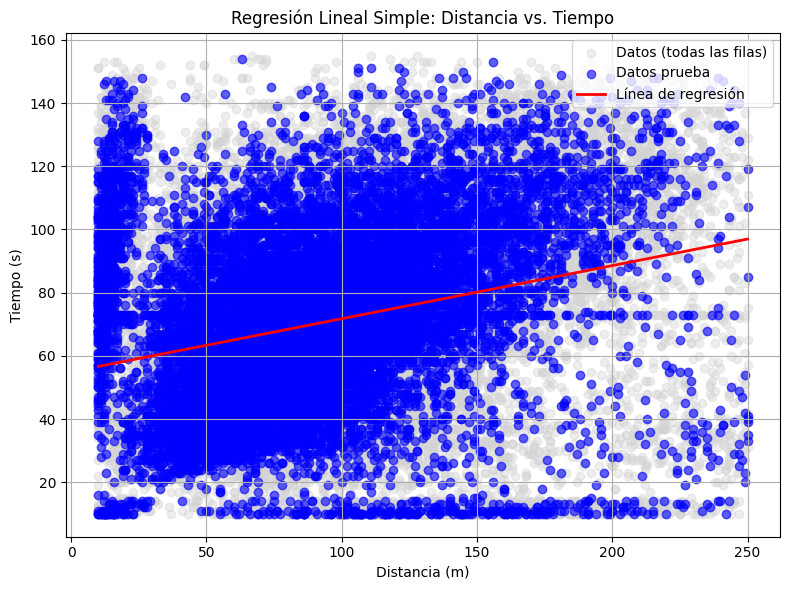

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2) Extraer X e y
X = df_modified[['Distancia']].values
y = df_modified['Tiempo'].values

# ——————————————————————————————————————
# (B) Dividir en entrenamiento / prueba
# ——————————————————————————————————————
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

# ——————————————————————————————————————
# (C) Ajustar Regresión Lineal Simple
# ——————————————————————————————————————
model = LinearRegression()
model.fit(X_train, y_train)

# ——————————————————————————————————————
# (D) Predecir sobre conjunto de prueba
# ——————————————————————————————————————
y_pred = model.predict(X_test)

# ——————————————————————————————————————
# (E) Calcular métricas de desempeño
# ——————————————————————————————————————
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("=== Métricas de Regresión Lineal Simple ===")
print(f"RMSE: {rmse:.2f} segundos")
print(f"MAE : {mae:.2f} segundos")
print(f"R²  : {r2:.4f}")

# ——————————————————————————————————————
# (F) Coeficiente e intercepto
# ——————————————————————————————————————
coef = model.coef_[0]
intercept = model.intercept_

print(f"\nCoeficiente (pendiente) para 'Distancia': {coef:.4f} seg/m")
print(f"Intercepto: {intercept:.2f} segundos")

# ——————————————————————————————————————
# (G) Graficar scatter y línea de regresión
# ——————————————————————————————————————
# Generar rango de X para la línea
X_min = df_modified['Distancia'].min()
X_max = df_modified['Distancia'].max()
X_range = np.linspace(X_min, X_max, 100).reshape(-1, 1)
y_line = model.predict(X_range)

plt.figure(figsize=(8, 6))
plt.scatter(df_modified['Distancia'], df_modified['Tiempo'],
            color='lightgray', alpha=0.4, label='Datos (todas las filas)')
plt.scatter(X_test, y_test,
            color='blue', alpha=0.6, label='Datos prueba')
plt.plot(X_range, y_line,
         color='red', linewidth=2, label='Línea de regresión')

plt.xlabel('Distancia (m)')
plt.ylabel('Tiempo (s)')
plt.title('Regresión Lineal Simple: Distancia vs. Tiempo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RMSE: Raíz del error cuadrático medio; mide cuánto, en promedio, difieren las predicciones del valor real (en segundos).

MAE: Error absoluto medio; promedio de la magnitud de las diferencias absolutas entre predicciones y valores reales.

R²: Proporción de la varianza de “Tiempo” explicada por “Distancia”; indica qué tan bien el modelo ajusta los datos.

Coeficiente: Incremento estimado en “Tiempo” por cada metro adicional de “Distancia” (0.1681 segundos por metro).

Intercepto: Valor de “Tiempo” predicho cuando “Distancia” es cero (54.95 segundos).

El coeficiente positivo (0.168 seg/m) respalda nuestra hipótesis: a mayor distancia recorrida, el jugador tiende a sobrevivir más tiempo. Sin embargo, el R² bajo (≈ 0.075) y el error medio (MAE ≈ 21 s / RMSE ≈ 26 s) muestran que la distancia por sí sola no explica gran parte del tiempo vivo. Por lo tanto, este modelo lineal sirve como primera aproximación, pero convendría agregar más predictores (kills, equipamiento, mapa, etc.) para mejorar la precisión.